# Clean Metadata
This notebook processes raw metadata provided by GISAID into the format required by Augur. Furthermore, it extracts additional information into unique variables.

## Setup

### Imports

In [2]:
import numpy as np
import pandas as pd
import plotnine as p9
import re

### Files

#### Inputs

In [3]:
input_gisaid = 'h3n2/data/raw/africa_Jun2018_Now.xls'

#### Outputs



In [4]:
export_augur = 'h3n2/data/clean/africa_clean.tsv'

### Parameters

## Load raw data from GISAID

In [5]:
meta_raw = pd.DataFrame(pd.read_excel(input_gisaid))
meta_raw.head()

,Isolate_Id,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id,HE Segment_Id,...,PB2 INSDC_Upload,PB1 INSDC_Upload,PA INSDC_Upload,HA INSDC_Upload,NP INSDC_Upload,NA INSDC_Upload,MP INSDC_Upload,NS INSDC_Upload,HE INSDC_Upload,P3 INSDC_Upload
0,EPI_ISL_320344,EPI1269115|3000822851_N8K9FDGB_v1_1,EPI1269116|3000822851_N8K9FDGB_v1_2,EPI1269114|3000822851_N8K9FDGB_v1_3,EPI1269118|3000822851_N8K9FDGB_v1_4,EPI1269111|3000822851_N8K9FDGB_v1_5,EPI1269117|3000822851_N8K9FDGB_v1_6,EPI1269113|3000822851_N8K9FDGB_v1_7,EPI1269112|3000822851_N8K9FDGB_v1_8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EPI_ISL_320345,EPI1269123|3000822852_N8K9FDGG_v1_1,EPI1269124|3000822852_N8K9FDGG_v1_2,EPI1269122|3000822852_N8K9FDGG_v1_3,EPI1269126|3000822852_N8K9FDGG_v1_4,EPI1269119|3000822852_N8K9FDGG_v1_5,EPI1269125|3000822852_N8K9FDGG_v1_6,EPI1269121|3000822852_N8K9FDGG_v1_7,EPI1269120|3000822852_N8K9FDGG_v1_8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EPI_ISL_320349,EPI1269155|3000822795_N8K9FD8J_v1_1,EPI1269156|3000822795_N8K9FD8J_v1_2,EPI1269154|3000822795_N8K9FD8J_v1_3,EPI1269158|3000822795_N8K9FD8J_v1_4,EPI1269151|3000822795_N8K9FD8J_v1_5,EPI1269157|3000822795_N8K9FD8J_v1_6,EPI1269153|3000822795_N8K9FD8J_v1_7,EPI1269152|3000822795_N8K9FD8J_v1_8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPI_ISL_336077,NaN,NaN,NaN,EPI1345964|MS-a-egypt-5730-2018h3S,NaN,EPI1345965|MS-a-egypt-5730-2018n2S,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EPI_ISL_336078,NaN,NaN,NaN,EPI1345966|MS-a-egypt-5816-2018h3S,NaN,EPI1345967|MS-a-egypt-5816-2018n2S,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep only the columns we are interested in.

In [6]:
retained_cols = [
    'Isolate_Name',
    'Collection_Date',
    'Isolate_Id',
    'Location',
    'Host',
    'Submitting_Lab',
    'Originating_Lab']

meta_working = meta_raw[retained_cols]

Standardize column name formatting:
- all lowercase
- underscore for word separation (already true)

In [7]:
meta_working.columns = [c.lower() for c in meta_working.columns]

Provide [required columns](https://docs.nextstrain.org/projects/ncov/en/wdl-optionals/analysis/data-prep.html#required-metadata) for Nextstrain.

In [8]:
meta_working = meta_working.rename(
    columns = {
        'isolate_name': 'strain',
        'collection_date': 'date'
    }
)
meta_working['virus'] = 'h3n2_flu'

In [9]:
meta_working.head(n=20)

,strain,date,isolate_id,location,host,submitting_lab,originating_lab,virus
0,A/Congo/416/2018,2018-07-05,EPI_ISL_320344,"Africa / Congo, the Democatic Republic of",Human,Centers for Disease Control and Prevention,INRB Service de Virologie,h3n2_flu
1,A/Congo/422/2018,2018-07-10,EPI_ISL_320345,"Africa / Congo, the Democatic Republic of",Human,Centers for Disease Control and Prevention,INRB Service de Virologie,h3n2_flu
2,A/Congo/357/2018,2018-06-14,EPI_ISL_320349,"Africa / Congo, the Democatic Republic of",Human,Centers for Disease Control and Prevention,INRB Service de Virologie,h3n2_flu
3,A/Egypt/5730/2018,2018-09-20,EPI_ISL_336077,Africa / Egypt,Human,Crick Worldwide Influenza Centre,Ministry of Health and Population,h3n2_flu
4,A/Egypt/5816/2018,2018-09-28,EPI_ISL_336078,Africa / Egypt,Human,Crick Worldwide Influenza Centre,Ministry of Health and Population,h3n2_flu
5,A/Egypt/6213/2018,2018-10-22,EPI_ISL_336079,Africa / Egypt,Human,Crick Worldwide Influenza Centre,Ministry of Health and Population,h3n2_flu
6,A/Kenya/155/2018,2018-07-17,EPI_ISL_336501,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu
7,A/Kenya/156/2018,2018-07-23,EPI_ISL_336502,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu
8,A/Kenya/157/2018,2018-07-24,EPI_ISL_336503,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu
9,A/Kenya/158/2018,2018-07-30,EPI_ISL_336504,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu


## Parse metadata

### Parse country

In [10]:
split_columns = meta_working['location'].str.split(' / ', expand=True)
meta_working['region'] = split_columns[0]
meta_working['country'] = split_columns[1]

In [11]:
meta_working.head(n=10)

,strain,date,isolate_id,location,host,submitting_lab,originating_lab,virus,region,country
0,A/Congo/416/2018,2018-07-05,EPI_ISL_320344,"Africa / Congo, the Democatic Republic of",Human,Centers for Disease Control and Prevention,INRB Service de Virologie,h3n2_flu,Africa,"Congo, the Democatic Republic of"
1,A/Congo/422/2018,2018-07-10,EPI_ISL_320345,"Africa / Congo, the Democatic Republic of",Human,Centers for Disease Control and Prevention,INRB Service de Virologie,h3n2_flu,Africa,"Congo, the Democatic Republic of"
2,A/Congo/357/2018,2018-06-14,EPI_ISL_320349,"Africa / Congo, the Democatic Republic of",Human,Centers for Disease Control and Prevention,INRB Service de Virologie,h3n2_flu,Africa,"Congo, the Democatic Republic of"
3,A/Egypt/5730/2018,2018-09-20,EPI_ISL_336077,Africa / Egypt,Human,Crick Worldwide Influenza Centre,Ministry of Health and Population,h3n2_flu,Africa,Egypt
4,A/Egypt/5816/2018,2018-09-28,EPI_ISL_336078,Africa / Egypt,Human,Crick Worldwide Influenza Centre,Ministry of Health and Population,h3n2_flu,Africa,Egypt
5,A/Egypt/6213/2018,2018-10-22,EPI_ISL_336079,Africa / Egypt,Human,Crick Worldwide Influenza Centre,Ministry of Health and Population,h3n2_flu,Africa,Egypt
6,A/Kenya/155/2018,2018-07-17,EPI_ISL_336501,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu,Africa,Kenya
7,A/Kenya/156/2018,2018-07-23,EPI_ISL_336502,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu,Africa,Kenya
8,A/Kenya/157/2018,2018-07-24,EPI_ISL_336503,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu,Africa,Kenya
9,A/Kenya/158/2018,2018-07-30,EPI_ISL_336504,Africa / Kenya,Human,Centers for Disease Control and Prevention,CDC-Kenya,h3n2_flu,Africa,Kenya


## Clean dataframe
Clean up values.

Clean strain names
* strip leading and trailing whitespace
* replace spaces with underscores
* replace apostrophes with dashes

In [12]:
meta_working['strain'] = (
    meta_working['strain']
    .str.strip()
)
meta_working['strain'] = (
    meta_working['strain']
    .apply(lambda x: re.sub(r'\s', '_', x))
)

meta_working['strain'] = (
    meta_working['strain']
    .apply(lambda x: re.sub(r"'", "-", x))
)

In [13]:
meta_working.head(n=10)['strain']

0     A/Congo/416/2018
1     A/Congo/422/2018
2     A/Congo/357/2018
3    A/Egypt/5730/2018
4    A/Egypt/5816/2018
5    A/Egypt/6213/2018
6     A/Kenya/155/2018
7     A/Kenya/156/2018
8     A/Kenya/157/2018
9     A/Kenya/158/2018
Name: strain, dtype: object

### Clean up countries

In [14]:
meta_working['country'].value_counts(dropna=False)

country
South Africa                        838
Togo                                412
Kenya                               387
Zambia                              217
Cote d'Ivoire                       166
Mali                                151
Niger                               146
Congo, the Democatic Republic of    115
Madagascar                          105
Ghana                               103
Burkina Faso                         96
Senegal                              89
Nigeria                              73
Tunisia                              71
Mauritius                            68
Cameroon                             63
Mozambique                           53
Ethiopia                             42
Algeria                              36
Morocco                              34
Reunion                              32
Egypt                                24
Mauritania                           16
Uganda                               12
Mayotte                         

In [15]:
meta_working['country'] = (
    meta_working['country']
    .replace(
        {'Congo, the Democatic Republic of': 'DRC',
         'Tanzania, United Republic of': 'Tanzania'}
    ))

In [16]:
meta_working['country'].value_counts(dropna=False)

country
South Africa     838
Togo             412
Kenya            387
Zambia           217
Cote d'Ivoire    166
Mali             151
Niger            146
DRC              115
Madagascar       105
Ghana            103
Burkina Faso      96
Senegal           89
Nigeria           73
Tunisia           71
Mauritius         68
Cameroon          63
Mozambique        53
Ethiopia          42
Algeria           36
Morocco           34
Reunion           32
Egypt             24
Mauritania        16
Uganda            12
Mayotte           12
Tanzania           7
Seychelles         6
Gabon              1
Name: count, dtype: int64

## Export for Augur
Export tab-delimited file (TSV) for input into Augur.

- Replace `NaN` values with a question mark character (`?`), as preferred by Augur.
- Drop raw columns that have been parsed to new, expanded columns.
- Put columns in preferred order. This is not necessary for Augur, but provides a standard order for my own human reading.
- **Drop duplicate strains.**

In [17]:
col_order = [
    'strain',
    'date',
    'virus',
    'region', 
    'country',
    'host', 
    'isolate_id',
    'submitting_lab',
    'originating_lab']

meta_working = meta_working[col_order]

meta_clean = meta_working.fillna('?')

meta_clean = meta_clean.drop_duplicates(subset='strain', keep=False)

meta_clean.to_csv(export_augur, sep='\t', index=False)

## Plot and list all strains by country

### Plot strain counts by country

In [18]:
meta_clean['strain'].count()

2797

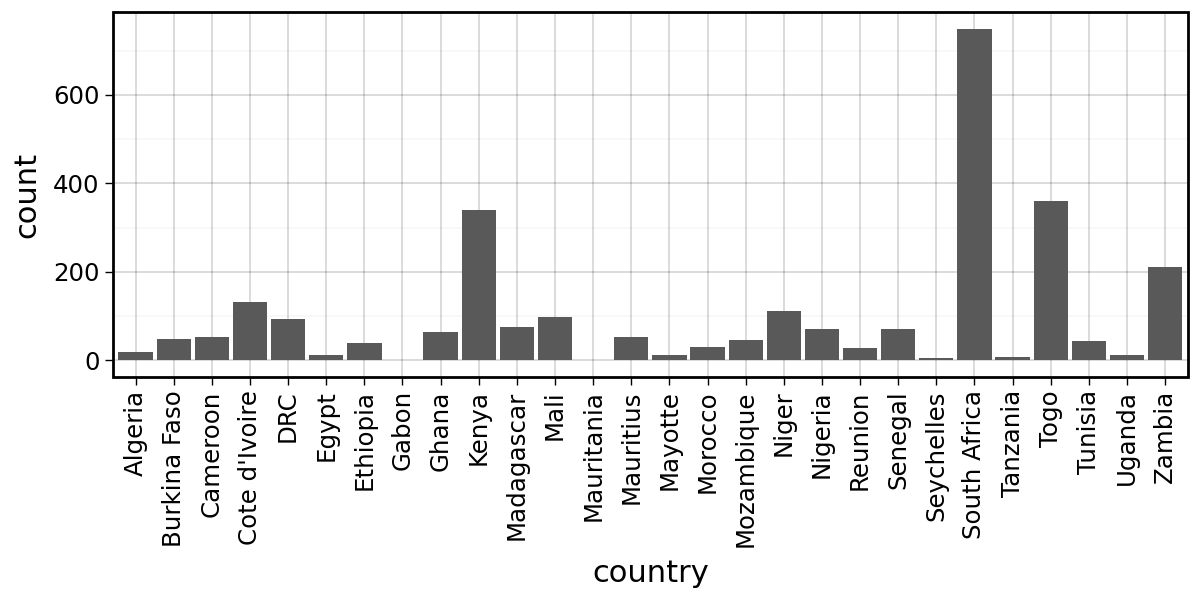

In [19]:
seqs_by_country = (
    p9.ggplot(meta_clean, p9.aes(x='country'))
    + p9.geom_bar()
    + p9.theme_linedraw()
    + p9.theme(axis_text_x=p9.element_text(angle=90, hjust=0.5))  # Adjust hjust value here
    + p9.theme(figure_size=(6, 3))
)

seqs_by_country


### List strains by country

In [20]:
by_country = meta_working.groupby('country')['strain'].unique()
for key, value in by_country.items():
    print(f"{key} (n={len(value)})")
    for v in value:
        print(v)

Algeria (n=27)
A/Algiers/368/2020
A/Tiaret/282/2020
A/Blida/42154/2022
A/Algeria/Blida/42081/2022
A/Algeria/Tebessa/43091/2022
A/Algeria/Tebessa/43189/2022
A/Algeria/Tebessa/44013/2022
A/Algeria/Algiers/44334/2022
A/Algeria/Algiers/44342/2022
A/Algeria/Tebessa/44348/2022
A/Algeria/Tebessa/44354/2022
A/Algeria/Bouira/44511/2022
A/Algeria/27/2019
A/Algeria/38/2019
A/Algeria/45/2019
A/Algeria/55/2019
A/Algeria/2131/2023
A/Algeria/1767/2023
A/Algeria/1229/2023
A/Algeria/2157/2023
A/Algiers/92675/2021
A/Blida/93748/2021
A/Eph_Blida/97875/2021
A/Blida/90977/2021
A/Bouira/44511/2022
A/Boumerdes/44092/2022
A/Algiers/43409/2022
Burkina Faso (n=72)
A/Burkina_Faso/2405/2018
A/Burkina_Faso/972/2018
A/Burkina_Faso/2401/2018
A/Burkina_Faso/2406/2018
A/Burkina_Faso/2417/2018
A/Burkina_Faso/1035/2018
A/Burkina_Faso/2410/2018
A/Burkina_Faso/1042/2018
A/Burkina_Faso/1055/2018
A/Burkina_Faso/31/2019
A/Burkina_Faso/15/2019
A/Burkina_Faso/1/2019
A/Burkina_Faso/1767/2019
A/Burkina_Faso/1770/2019
A/Burkina_F